In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


In [155]:
ds = pd.read_csv("drug200.csv")
ds.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


<AxesSubplot:>

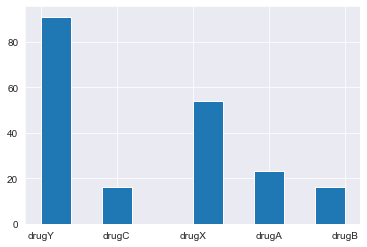

In [156]:
ds["Drug"].hist()

In [157]:
#3 Plot the distribution of the instances in each class and store the graphic in a file calles drug-distribution.pdf
# Description of the dataset
print('SHAPE OF DATASET: ', ds.shape, '\n\nCOLUMNS IN DATASET: ', ds.columns,'\n\nDrug ClASS IN DATASET: ',ds.Drug.unique(),)

SHAPE OF DATASET:  (200, 6) 

COLUMNS IN DATASET:  Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object') 

Drug ClASS IN DATASET:  ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


AxesSubplot(0.125,0.125;0.775x0.755)


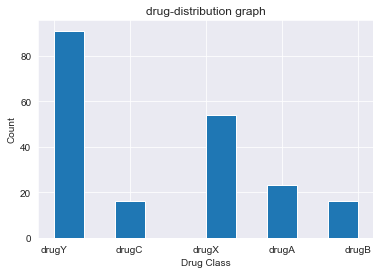

In [158]:
#first count each class then print bar graph
plt.title("drug-distribution graph")
plt.xlabel('Drug Class')
plt.ylabel("Count")
print(ds["Drug"].hist())

plt.savefig('drug-Distribution.pdf')

plt.show()

In [159]:
#Grouping and perform count over each drug class
num =  ds.groupby('Drug')['Drug'].count()
print(num)

Drug
drugA    23
drugB    16
drugC    16
drugX    54
drugY    91
Name: Drug, dtype: int64


#Replacing categorical values of Sex column by dummy variables (Because it is independent category i.e. No one is higher or lower)

In [160]:
#use dummies 特征提取 one hot encode
dummy_variable_sex = pd.get_dummies(ds.Sex)
# Concatenate 
data = pd.concat([ds, dummy_variable_sex], axis=1)
print(data.head(5))
# Drop sex column
data.drop("Sex", axis = 1, inplace=True)
print(data.head(5))

   Age Sex      BP Cholesterol  Na_to_K   Drug  F  M
0   23   F    HIGH        HIGH   25.355  drugY  1  0
1   47   M     LOW        HIGH   13.093  drugC  0  1
2   47   M     LOW        HIGH   10.114  drugC  0  1
3   28   F  NORMAL        HIGH    7.798  drugX  1  0
4   61   F     LOW        HIGH   18.043  drugY  1  0
   Age      BP Cholesterol  Na_to_K   Drug  F  M
0   23    HIGH        HIGH   25.355  drugY  1  0
1   47     LOW        HIGH   13.093  drugC  0  1
2   47     LOW        HIGH   10.114  drugC  0  1
3   28  NORMAL        HIGH    7.798  drugX  1  0
4   61     LOW        HIGH   18.043  drugY  1  0


In [161]:
#Extracting target variable  提取列数据 
y = data.iloc[:, -3].values #take Drug column 

In [162]:
# Dropping Drug column
dataset = data.drop("Drug", axis = 1, inplace=False)
print(dataset.head(5))

   Age      BP Cholesterol  Na_to_K  F  M
0   23    HIGH        HIGH   25.355  1  0
1   47     LOW        HIGH   13.093  0  1
2   47     LOW        HIGH   10.114  0  1
3   28  NORMAL        HIGH    7.798  1  0
4   61     LOW        HIGH   18.043  1  0


#Replacing categorical values of BP and Cholesterol column by Label encoder (Because this is dependent ie higher and lower)

In [163]:
# Converting dataframe into arrays
dataset_array = dataset.values
dataset_array

array([[23, 'HIGH', 'HIGH', 25.355, 1, 0],
       [47, 'LOW', 'HIGH', 13.093, 0, 1],
       [47, 'LOW', 'HIGH', 10.114, 0, 1],
       ...,
       [52, 'NORMAL', 'HIGH', 9.894, 0, 1],
       [23, 'NORMAL', 'NORMAL', 14.02, 0, 1],
       [40, 'LOW', 'NORMAL', 11.349, 1, 0]], dtype=object)

In [164]:
# Using sklearn library's LabelEncoder class
# Encode BP label with value between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder
le_BP = LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
dataset_array[:,1] = le_BP.transform(dataset_array[:,1])
dataset_array

array([[23, 0, 'HIGH', 25.355, 1, 0],
       [47, 1, 'HIGH', 13.093, 0, 1],
       [47, 1, 'HIGH', 10.114, 0, 1],
       ...,
       [52, 2, 'HIGH', 9.894, 0, 1],
       [23, 2, 'NORMAL', 14.02, 0, 1],
       [40, 1, 'NORMAL', 11.349, 1, 0]], dtype=object)

In [165]:
# Using sklearn library's LabelEncoder class
# Encode Cholesterol label with value between 0 and n_classes-1
le_Chole = LabelEncoder()
le_Chole.fit([ 'LOW', 'NORMAL', 'HIGH'])
print(le_Chole.transform(['LOW', 'NORMAL', 'HIGH']))
dataset_array[:,2] = le_Chole.transform(dataset_array[:,2])
X = dataset_array
X

[1 2 0]


array([[23, 0, 0, 25.355, 1, 0],
       [47, 1, 0, 13.093, 0, 1],
       [47, 1, 0, 10.114, 0, 1],
       ...,
       [52, 2, 0, 9.894, 0, 1],
       [23, 2, 2, 14.02, 0, 1],
       [40, 1, 2, 11.349, 1, 0]], dtype=object)

#Splitting the dataset into the Train set and Test set

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

#NB:a Gaussian Naive Bayes Classifier (naivebayes.GaussianNB) with the default parameters.

#naivebayes.GaussianNB

In [167]:
f=open('drugs-performance.txt','w')

# a)GaussianNB default parameters

In [168]:
# GaussianNB Naive Bayes
print("--------------------------------GaussianNB default values-----------------------------------", file=f)
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)


# predict, Perform classification on an array of test vectors X.
y_pred_class = gnb.predict(X_test)
# predict probabilities, Return probability estimates for the test vector X.
y_pred_proba = gnb.predict_proba(X_test)

# b) confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print("(b) the confusion matrix: ", file=f)
print(confusion, file=f)

# c) the precision, recall and F1-measure for each class
print("(c) the precision, recall and F1-measure for each class of the test set : ", file=f)
print(metrics.classification_report(y_test, y_pred_class),file=f)



# d) the accuracy, macro-average F1 and weighted-average F1 of the model

accuracy = metrics.accuracy_score(y_test, y_pred_class)
print("(d) the accuracy, macro-average F1 and weighted-average F1 of the model: ", file=f)
print("Accuracy score of the test set is : " + str(accuracy), file=f)

macro_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='macro')
print("Macro average F1 of the test set is : " + str(macro_avg_F1), file=f)
weighted_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='weighted')
print("Weighted average F1 of the test set is : " + str(weighted_avg_F1), file=f)

# b)Base-DT classifier

In [169]:
# Decision Tree
print("--------------------------------Decision Tree default values-----------------------------------", file=f)
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
#Create a Decision Tree Classifier
mod2 = DecisionTreeClassifier()

#Train the model using the training sets
mod2.fit(X_train, y_train)

# predict, Perform classification on an array of test vectors X.
y_pred_class = mod2.predict(X_test)
# predict probabilities, Return probability estimates for the test vector X.
y_pred_proba = mod2.predict_proba(X_test)

# b) confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print("(b) the confusion matrix: ", file=f)
print(confusion, file=f)

# c) the precision, recall and F1-measure for each class
print("(c) the precision, recall and F1-measure for each class of the test set : ", file=f)
print(metrics.classification_report(y_test, y_pred_class),file=f)


# d) the accuracy, macro-average F1 and weighted-average F1 of the model

accuracy = metrics.accuracy_score(y_test, y_pred_class)
print("(d) the accuracy, macro-average F1 and weighted-average F1 of the model: ", file=f)
print("Accuracy score of the test set is : " + str(accuracy), file=f)

macro_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='macro')
print("Macro average F1 of the test set is : " + str(macro_avg_F1), file=f)
weighted_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='weighted')
print("Weighted average F1 of the test set is : " + str(weighted_avg_F1), file=f)

# c) Top-DT 


In [170]:
 # GridSearchCV
 # find the best combination of hyper-parameters
 # as determined by the evalustion function that you have determined in step3

print("--------------------------------Top-DT hyperoarameter values-----------------------------------", file=f)

from sklearn.model_selection import GridSearchCV
#Create a Decision tree Classifier
mod3 = DecisionTreeClassifier()
params = {'criterion': ['gini','entropy'],'max_depth':[3,5],'min_samples_split':[3,5,7]}
#Create the grid search object
grid = GridSearchCV(mod3, param_grid=params, cv=5)
#Fit the grid search objet to the data to compute the optimal model
grid = grid.fit(X_train, y_train)
print('best_estimator:', grid.best_params_, 'best_score:', grid.best_score_, file=f)



# use best combination of hyper-parameters to train X
mod3_best = grid.best_estimator_
mod3_best.fit(X_train, y_train)

# predict, Perform classification on an array of test vectors X.
y_pred_class = mod3_best.predict(X_test)
#print('train score: ', mod3_best.score(X_train,y_train), 'test score: ', mod3_best.score(X_test,y_test))


# b) confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print("(b) the confusion matrix: ", file=f)
print(confusion, file=f)

# c) the precision, recall and F1-measure for each class
print("(c) the precision, recall and F1-measure for each class of the test set : ", file=f)
print(metrics.classification_report(y_test, y_pred_class),file=f)


# d) the accuracy, macro-average F1 and weighted-average F1 of the model

accuracy = metrics.accuracy_score(y_test, y_pred_class)
print("(d) the accuracy, macro-average F1 and weighted-average F1 of the model: ", file=f)
print("Accuracy score of the test set is : " + str(accuracy), file=f)
macro_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='macro')
print("Macro average F1 of the test set is : " + str(macro_avg_F1), file=f)
weighted_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='weighted')
print("Weighted average F1 of the test set is : " + str(weighted_avg_F1), file=f)

# d) PER: Perceptron(linear_model.Perceptron) with default parameter values
 

In [171]:

print("--------------------------------PER with default parameter values-----------------------------------", file=f)

from sklearn.linear_model import Perceptron
import warnings
warnings.filterwarnings('ignore')

# create Perceptron()
mod4 = Perceptron()

# fit training dataset
mod4.fit(X_train, y_train)
# predict, Perform classification on an array of test vectors X.
y_pred_class = mod4.predict(X_test)

# b) confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print("(b) the confusion matrix: ", file=f)
print(confusion, file=f)

# c) the precision, recall and F1-measure for each class
print("(c) the precision, recall and F1-measure for each class of the test set : ", file=f)
print(metrics.classification_report(y_test, y_pred_class), file=f)


# d) the accuracy, macro-average F1 and weighted-average F1 of the model

accuracy = metrics.accuracy_score(y_test, y_pred_class)
print("(d) the accuracy, macro-average F1 and weighted-average F1 of the model: ", file=f)
print("Accuracy score of the test set is : " + str(accuracy), file=f)
macro_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='macro')
print("Macro average F1 of the test set is : " + str(macro_avg_F1), file=f)
weighted_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='weighted')
print("Weighted average F1 of the test set is : " + str(weighted_avg_F1), file=f)




# e) Base-MLP:(neural_network.MLPClassifier) with 1 hidden layer of 100 neurons, sigmoid/logistic as activation function , stochastic gradient descent and default values for the rest of parameter

In [172]:
print("--------------------------------Base-MLP with default parameter values-----------------------------------",file=f)

from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")


# create MLP classifier
mod5 = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', solver='sgd')

# fit training dataset
mod5.fit(X_train, y_train)
# predict, Perform classification on an array of test vectors X.
y_pred_class = mod5.predict(X_test)

# b) confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print("(b) the confusion matrix: ", file=f)
print(confusion, file=f)

# c) the precision, recall and F1-measure for each class
print("(c) the precision, recall and F1-measure for each class of the test set : ", file=f)
print(metrics.classification_report(y_test, y_pred_class), file=f)


# d) the accuracy, macro-average F1 and weighted-average F1 of the model

accuracy = metrics.accuracy_score(y_test, y_pred_class)
print("(d) the accuracy, macro-average F1 and weighted-average F1 of the model: ", file=f)
print("Accuracy score of the test set is : " + str(accuracy), file=f)
macro_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='macro')
print("Macro average F1 of the test set is : " + str(macro_avg_F1), file=f)
weighted_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='weighted')
print("Weighted average F1 of the test set is : " + str(weighted_avg_F1), file=f)



# f) TOP-MLP 
2 hidden layer with 30+50 nodes, or 3 hidden layer with 10+10+10

In [173]:
# GridSearchCV
 # find the best combination of hyper-parameters
 # as determined by the evalustion function that you have determined in step3

print("--------------------------------Top-MLP hyperoarameter values-----------------------------------", file=f)


#Create a base MLP Classifier
mod6 = MLPClassifier()
params = {  'hidden_layer_sizes': [(30,50,), (10,10,10,)],
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'solver': ['adam', 'sgd']}
#Create the grid search object
grid = GridSearchCV(mod6, param_grid=params)
#Fit the grid search objet to the data to compute the optimal model
grid = grid.fit(X_train, y_train)
print('a) best parameter:', grid.best_params_,file=f)
hidden_layer_sizes_ = grid.best_params_['hidden_layer_sizes']
activation_= grid.best_params_['activation']
solver_= grid.best_params_['solver']
# use best combination of hyper-parameters to train X
mod6_best=MLPClassifier(hidden_layer_sizes=hidden_layer_sizes_,activation=activation_,solver=solver_)
mod6_best.fit(X_train,y_train)


# predict, Perform classification on an array of test vectors X.
y_pred_class = mod6_best.predict(X_test)



# b) confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print("(b) the confusion matrix: ", file=f)
print(confusion,file=f)

# c) the precision, recall and F1-measure for each class
print("(c) the precision, recall and F1-measure for each class of the test set : ",file=f)
print(metrics.classification_report(y_test, y_pred_class),file=f)


# d) the accuracy, macro-average F1 and weighted-average F1 of the model

accuracy = metrics.accuracy_score(y_test, y_pred_class)
print("(d) the accuracy, macro-average F1 and weighted-average F1 of the model: ",file=f)
print("Accuracy score of the test set is : " + str(accuracy),file=f)
macro_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='macro')
print("Macro average F1 of the test set is : " + str(macro_avg_F1),file=f)
weighted_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='weighted')
print("Weighted average F1 of the test set is : " + str(weighted_avg_F1),file=f)

In [174]:
import statistics
a=[]
for i in range(5):
    a.append(i)
print(statistics.stdev(a))

 
# creating a simple data - set
sample = [1,1,1,1,1]
 
# Prints standard deviation
# xbar is set to default value of 1
print("Standard Deviation of sample is  "+ str(statistics.stdev(sample)))

1.5811388300841898
Standard Deviation of sample is  0.0


# repeat 10 times

In [175]:
import statistics 
totalAccuray=0
totalMacro=0
totalWeight=0
a=[]
m=[]
w=[]
print('**************************************************************************************',file=f)
print("************************this is 10 times***************************************",file=f)
print("********************************************************************************",file=f)
print("--------------------------------GaussianNB default values-----------------------------------", file=f)
    
for i in range(10):
   
#Create a Gaussian Classifier
    gnb = GaussianNB()

#Train the model using the training sets
    gnb.fit(X_train, y_train)

# predict, Perform classification on an array of test vectors X.
    y_pred_class = gnb.predict(X_test)
# predict probabilities, Return probability estimates for the test vector X.
    y_pred_proba = gnb.predict_proba(X_test)

# b) confusion matrix

    confusion = metrics.confusion_matrix(y_test, y_pred_class)

# d) the accuracy, macro-average F1 and weighted-average F1 of the model

    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    a.append(accuracy)
    totalAccuray+=accuracy
 
    macro_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='macro')
    m.append(macro_avg_F1)
    totalMacro+=macro_avg_F1
  
    weighted_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='weighted')
    w.append(weighted_avg_F1)
    totalWeight+=weighted_avg_F1
    
print("the list of accuracy"+str(a), file=f)
print("average of accuracy score of hte test set is :"+str(totalAccuray/10), file=f)
print("standard deviation for accuracy: "+str(statistics.stdev(a)), file=f)
print("the list of Macro average F1"+str(m), file=f)
print("average of Macro average F1 of the test set is : " + str(totalMacro/10), file=f)
print("standard deviation for Macro average F1: "+str(statistics.stdev(m)), file=f)
print("the list of weight average F1: "+str(w), file=f)
print("average of Weighted average F1 of the test set is : " + str(totalWeight/10), file=f)
print("standard deviation for weight average F1: "+str(statistics.stdev(w)), file=f)


In [176]:
totalAccuray=0
totalMacro=0
totalWeight=0
a=[]
m=[]
w=[]
print('**************************************************************************************',file=f)

        # Decision Tree
print("--------------------------------Decision Tree default values-----------------------------------", file=f)
    
for i in range(10):
    
    #Create a Decision Tree Classifier
    mod2 = DecisionTreeClassifier()

    #Train the model using the training sets
    mod2.fit(X_train, y_train)

    # predict, Perform classification on an array of test vectors X.
    y_pred_class = mod2.predict(X_test)
    # predict probabilities, Return probability estimates for the test vector X.
    y_pred_proba = mod2.predict_proba(X_test)

    # b) confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_pred_class)

    # d) the accuracy, macro-average F1 and weighted-average F1 of the model

    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    
    macro_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='macro')
    
    
    weighted_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='weighted')
    a.append(accuracy)
    m.append(macro_avg_F1)
    w.append(weighted_avg_F1)
    totalAccuray+=accuracy
    totalMacro+=macro_avg_F1
    totalWeight+=weighted_avg_F1
    
print("the list of accuracy"+str(a), file=f)
print("average of accuracy score of hte test set is :"+str(totalAccuray/10), file=f)
print("standard deviation for accuracy: "+str(statistics.stdev(a)), file=f)
print("the list of Macro average F1"+str(m), file=f)
print("average of Macro average F1 of the test set is : " + str(totalMacro/10), file=f)
print("standard deviation for Macro average F1: "+str(statistics.stdev(m)), file=f)
print("the list of weight average F1: "+str(w), file=f)
print("average of Weighted average F1 of the test set is : " + str(totalWeight/10), file=f)
print("standard deviation for weight average F1: "+str(statistics.stdev(w)), file=f)


In [177]:
totalAccuray=0
totalMacro=0
totalWeight=0
a=[]
m=[]
w=[]
print('**************************************************************************************')
print("--------------------------------Top-DT hyperoarameter values-----------------------------------", file=f)

for i in range(10):    
    
    #Create a Decision tree Classifier
    mod3 = DecisionTreeClassifier()
    params = {'criterion': ['gini','entropy'],'max_depth':[3,5],'min_samples_split':[3,5,7]}
    #Create the grid search object
    grid = GridSearchCV(mod3, param_grid=params, cv=5)
    #Fit the grid search objet to the data to compute the optimal model
    grid = grid.fit(X_train, y_train)
  

    # use best combination of hyper-parameters to train X
    mod3_best = grid.best_estimator_
    mod3_best.fit(X_train, y_train)

    # predict, Perform classification on an array of test vectors X.
    y_pred_class = mod3_best.predict(X_test)
    #print('train score: ', mod3_best.score(X_train,y_train), 'test score: ', mod3_best.score(X_test,y_test))


    # b) confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
   
    # c) the precision, recall and F1-measure for each class
  

    # d) the accuracy, macro-average F1 and weighted-average F1 of the model

    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    
    macro_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='macro')

    weighted_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='weighted')
    
    a.append(accuracy)
    m.append(macro_avg_F1)
    w.append(weighted_avg_F1)
    totalAccuray+=accuracy
    totalMacro+=macro_avg_F1
    totalWeight+=weighted_avg_F1
    
print("the list of accuracy"+str(a), file=f)
print("average of accuracy score of hte test set is :"+str(totalAccuray/10), file=f)
print("standard deviation for accuracy: "+str(statistics.stdev(a)), file=f)
print("the list of Macro average F1"+str(m), file=f)
print("average of Macro average F1 of the test set is : " + str(totalMacro/10), file=f)
print("standard deviation for Macro average F1: "+str(statistics.stdev(m)), file=f)
print("the list of weight average F1: "+str(w), file=f)
print("average of Weighted average F1 of the test set is : " + str(totalWeight/10), file=f)
print("standard deviation for weight average F1: "+str(statistics.stdev(w)), file=f)


**************************************************************************************


In [178]:
totalAccuray=0
totalMacro=0
totalWeight=0
a=[]
m=[]
w=[]
print('**************************************************************************************')
print("--------------------------------PER with default parameter values-----------------------------------", file=f)

for i in range(10):
   
    # create Perceptron()
    mod4 = Perceptron()

    # fit training dataset
    mod4.fit(X_train, y_train)
    # predict, Perform classification on an array of test vectors X.
    y_pred_class = mod4.predict(X_test)

    # b) confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
   

    # c) the precision, recall and F1-measure for each class
  

    # d) the accuracy, macro-average F1 and weighted-average F1 of the model

    accuracy = metrics.accuracy_score(y_test, y_pred_class)
  
    macro_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='macro')
  
    weighted_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='weighted')
  
    a.append(accuracy)
    m.append(macro_avg_F1)
    w.append(weighted_avg_F1)
    totalAccuray+=accuracy
    totalMacro+=macro_avg_F1
    totalWeight+=weighted_avg_F1
    
print("the list of accuracy"+str(a), file=f)
print("average of accuracy score of hte test set is :"+str(totalAccuray/10), file=f)
print("standard deviation for accuracy: "+str(statistics.stdev(a)), file=f)
print("the list of Macro average F1"+str(m), file=f)
print("average of Macro average F1 of the test set is : " + str(totalMacro/10), file=f)
print("standard deviation for Macro average F1: "+str(statistics.stdev(m)), file=f)
print("the list of weight average F1: "+str(w), file=f)
print("average of Weighted average F1 of the test set is : " + str(totalWeight/10), file=f)
print("standard deviation for weight average F1: "+str(statistics.stdev(w)), file=f)


**************************************************************************************


In [179]:
totalAccuray=0
totalMacro=0
totalWeight=0
a=[]
m=[]
w=[]
print('**************************************************************************************')
print("--------------------------------Base-MLP with default parameter values-----------------------------------",file=f)

for i in range(10):
    
    # create MLP classifier
    mod5 = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', solver='sgd')

    # fit training dataset
    mod5.fit(X_train, y_train)
    # predict, Perform classification on an array of test vectors X.
    y_pred_class = mod5.predict(X_test)

    # b) confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
  
    # c) the precision, recall and F1-measure for each class
  

    # d) the accuracy, macro-average F1 and weighted-average F1 of the model

    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    
    macro_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='macro')
   # print("Macro average F1 of the test set is : " + str(macro_avg_F1), file=f)
    weighted_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='weighted')
    #print("Weighted average F1 of the test set is : " + str(weighted_avg_F1), file=f)
    GridSearchCV
    # find the best combination of hyper-parameters
    # as determined by the evalustion function that you have determined in step3
    a.append(accuracy)
    m.append(macro_avg_F1)
    w.append(weighted_avg_F1)
    totalAccuray+=accuracy
    totalMacro+=macro_avg_F1
    totalWeight+=weighted_avg_F1
    
print("the list of accuracy"+str(a), file=f)
print("average of accuracy score of hte test set is :"+str(totalAccuray/10), file=f)
print("standard deviation for accuracy: "+str(statistics.stdev(a)), file=f)
print("the list of Macro average F1"+str(m), file=f)
print("average of Macro average F1 of the test set is : " + str(totalMacro/10), file=f)
print("standard deviation for Macro average F1: "+str(statistics.stdev(m)), file=f)
print("the list of weight average F1: "+str(w), file=f)
print("average of Weighted average F1 of the test set is : " + str(totalWeight/10), file=f)
print("standard deviation for weight average F1: "+str(statistics.stdev(w)), file=f)


**************************************************************************************


In [180]:

totalAccuray=0
totalMacro=0
totalWeight=0
a=[]
m=[]
w=[]
print('**************************************************************************************')
print("--------------------------------Top-MLP hyperoarameter values-----------------------------------", file=f)
for i in range(10):
    #Create a base MLP Classifier
    mod6 = MLPClassifier()
    params = {  'hidden_layer_sizes': [(30,50,), (10,10,10,)],
        'activation': ['logistic', 'tanh', 'relu', 'identity'],
        'solver': ['adam', 'sgd']}
    #Create the grid search object
    grid = GridSearchCV(mod6, param_grid=params)
    #Fit the grid search objet to the data to compute the optimal model
    grid = grid.fit(X_train, y_train)
    #print('a) best parameter:', grid.best_params_,file=f)
    hidden_layer_sizes_ = grid.best_params_['hidden_layer_sizes']
    activation_= grid.best_params_['activation']
    solver_= grid.best_params_['solver']
    # use best combination of hyper-parameters to train X
    mod6_best=MLPClassifier(hidden_layer_sizes=hidden_layer_sizes_,activation=activation_,solver=solver_)
    mod6_best.fit(X_train,y_train)


    # predict, Perform classification on an array of test vectors X.
    y_pred_class = mod6_best.predict(X_test)

    # b) confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
   
    # c) the precision, recall and F1-measure for each class
    

    # d) the accuracy, macro-average F1 and weighted-average F1 of the model

    accuracy = metrics.accuracy_score(y_test, y_pred_class)
 #   print("(d) the accuracy, macro-average F1 and weighted-average F1 of the model: ",file=f)
  #  print("Accuracy score of the test set is : " + str(accuracy),file=f)
    macro_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='macro')
 #   print("Macro average F1 of the test set is : " + str(macro_avg_F1),file=f)
    weighted_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='weighted')
  #  print("Weighted average F1 of the test set is : " + str(weighted_avg_F1),file=f)
    a.append(accuracy)
    m.append(macro_avg_F1)
    w.append(weighted_avg_F1)
    totalAccuray+=accuracy
    totalMacro+=macro_avg_F1
    totalWeight+=weighted_avg_F1
    
print("the list of accuracy"+str(a), file=f)
print("average of accuracy score of hte test set is :"+str(totalAccuray/10), file=f)
print("standard deviation for accuracy: "+str(statistics.stdev(a)), file=f)
print("the list of Macro average F1"+str(m), file=f)
print("average of Macro average F1 of the test set is : " + str(totalMacro/10), file=f)
print("standard deviation for Macro average F1: "+str(statistics.stdev(m)), file=f)
print("the list of weight average F1: "+str(w), file=f)
print("average of Weighted average F1 of the test set is : " + str(totalWeight/10), file=f)
print("standard deviation for weight average F1: "+str(statistics.stdev(w)), file=f)




    
    
    
   

**************************************************************************************
